# Task
Load the Parquet Files

## Load the specified parquet file

### Subtask:
Convert from bytes to pixel brightness



**Reasoning**:
Update the file path in the existing code cell to load the specified parquet file and execute the cell.



## Inspect the dataframe

### Subtask:
Save to pandas df



**Reasoning**:
Display the column names, data types, and first few rows of the DataFrame to understand its structure and the nature of the image data.



## Extract and display images

### Subtask:
Based on the DataFrame structure, write code to extract the image data (e.g., if it's in a specific column) and display the images. This might require using libraries like Pillow or OpenCV.


**Reasoning**:
Import PIL and iterate through the first few rows of the dataframe to extract and display the images.



In [1]:
# Ensure pyarrow is installed in this kernel
!pip install --quiet pyarrow
!pip install pandas Pillow kagglehub ipywidgets numpy matplotlib pyarrow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [1]:
import pandas as pd
from PIL import Image
import io
import numpy as np
import os
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import matplotlib.pyplot as plt


In [3]:
# Load parquet files
# Make sure to reference download instructions. You have to download the kaggle dataset and upload it, rename it to a data directory. Video guide coming soon
#from: https://drive.google.com/drive/folders/12-1XR8df-rYkwJuMqMgXYQ9dm6EoDx0f?usp=drive_link
#quickstart guide: https://www.youtube.com/watch?v=WPRarAeelAM
#Original source + description: https://advp.niagads.org/downloads
train_df = pd.read_parquet("train.parquet")
test_df  = pd.read_parquet("test.parquet")

def bytes_to_pixels(b: bytes) -> np.ndarray:
    """
    Convert raw image bytes (e.g. JPEG/PNG) into a 2D numpy array of pixel values (grayscale).
    """
    img = Image.open(io.BytesIO(b))  # convert to grayscale
    return np.array(img)
def extract_bytes(blob):
    """
    Unwrap a dict‐wrapped binary payload if needed,
    otherwise return blob directly.
    """
    if isinstance(blob, dict):
        # try common keys
        for key in ("bytes", "data", "image"):
            if key in blob and isinstance(blob[key], (bytes, bytearray)):
                return blob[key]
        # fallback: first bytes‐like value
        for v in blob.values():
            if isinstance(v, (bytes, bytearray)):
                return v
        raise TypeError(f"No bytes found in dict payload: {list(blob.keys())}")
    return blob

train_df["image"] = train_df["image"].apply(lambda blob: bytes_to_pixels(extract_bytes(blob)))
test_df["image"]  = test_df["image"].apply(lambda blob: bytes_to_pixels(extract_bytes(blob)))




1. label = 2


/tmp/ipython-input-4051836937.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(pixels.astype("uint8"), mode="L")


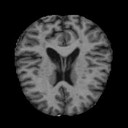

2. label = 0


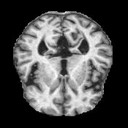

3. label = 3


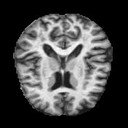

4. label = 3


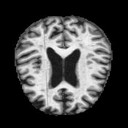

5. label = 2


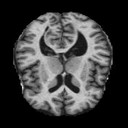

6. label = 2


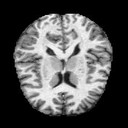

7. label = 2


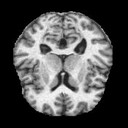

8. label = 2


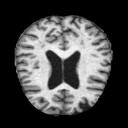

9. label = 3


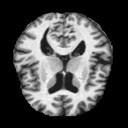

10. label = 2


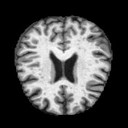

In [4]:
def display_images(df, n=10):
    """
    Display the first n grayscale images (numpy arrays) from df
    along with their labels. Assumes df has columns 'image' and 'label'.
    """
    for i, (_, row) in enumerate(df.head(n).iterrows(), start=1):
        pixels = row["image"]
        label = row.get("label", "")
        # Create a PIL image in 'L' mode (8-bit pixels, black and white)
        img = Image.fromarray(pixels.astype("uint8"), mode="L")
        print(f"{i}. label = {label}")
        display(img)
display_images(train_df)

In [5]:
res = train_df.columns
print(res)

Index(['image', 'label'], dtype='object')


In [6]:
len(train_df.index)

5120

In [7]:
train_df.head()

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2


In [ ]:
test_df.head()

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [20]:
#i want to check what type the image is?
print(train_df['image'].dtype)  # often 'object'

object


In [21]:
print(train_df['image'].head().map(type))

0    <class 'numpy.ndarray'>
1    <class 'numpy.ndarray'>
2    <class 'numpy.ndarray'>
3    <class 'numpy.ndarray'>
4    <class 'numpy.ndarray'>
Name: image, dtype: object


Greaet! it is a numpy array object!

In [8]:
len(test_df.index)

1280

In [9]:
res2 = train_df.columns
print(res)

Index(['image', 'label'], dtype='object')


In [10]:
train_df.columns

Index(['image', 'label'], dtype='object')

In [25]:
#check for missing values or NA's?
train_df.isnull().any()
#great!!! no missing values

,0
image,False
label,False


### want to count the labels (return each, and each per class, and make histogram)

In [11]:
unique_names = train_df['label'].nunique()
print(unique_names)

4


In [12]:
# ok, so 4 classes, now count the occurences of each

#column_counts = train_df['label'].apply(pd.Series.value_counts)
#print(column_counts)

In [13]:
#that didnt work, but i just asked copilot
#'I have a pandas dataframe with a column called 'label' - which has 4 types.  I want to count the number of each of these 4 types that appear in that column.  give me the python code or pandas code to do so'
#here is the code it returned:

train_df['label'].value_counts()

,count
label,
2,2566
3,1781
0,724
1,49


In [14]:
#great that worked!!!
#there are alternate ways to do so that copilot suggested, here is one

train_df.groupby('label').size()

,0
label,
0,724
1,49
2,2566
3,1781


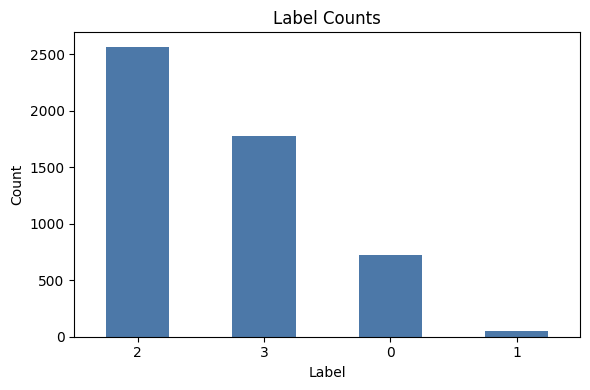

In [15]:
#for fun, lets generate a histogram


#import matplotlib.pyplot as plt    #altready imported

counts = train_df['label'].value_counts()

plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color='#4C78A8')  # bar chart for categorical counts
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


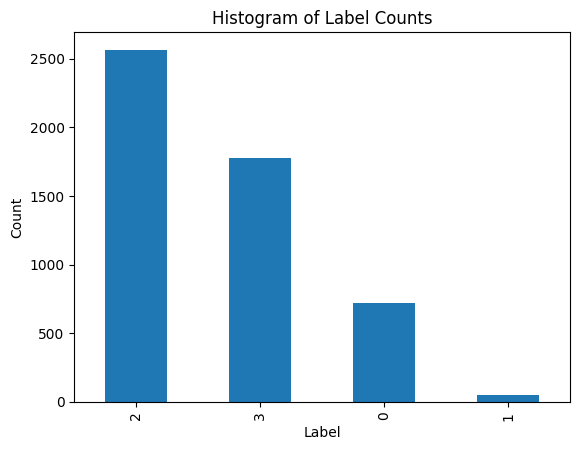

In [16]:
#here is some simpler code:


train_df['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Label Counts')
plt.show()


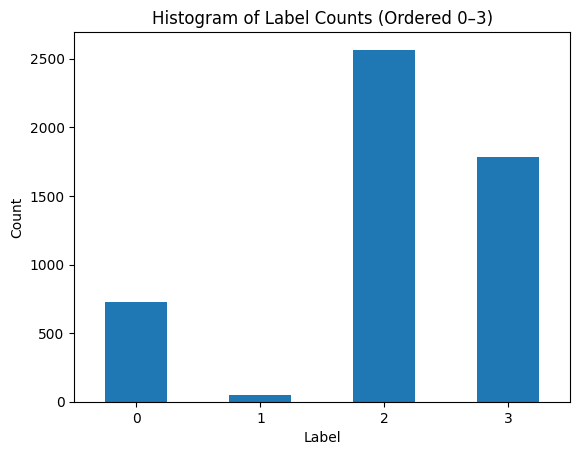

In [17]:
#great, now i want to order them from 0-3, not by highest to lowest


labels = [0, 1, 2, 3]  # or ["0", "1", "2", "3"] if your column is strings
counts = train_df['label'].value_counts().reindex(labels, fill_value=0)

counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Label Counts (Ordered 0–3)')
plt.xticks(rotation=0)
plt.show()


####sweeeet, whats next?  need to think a bit


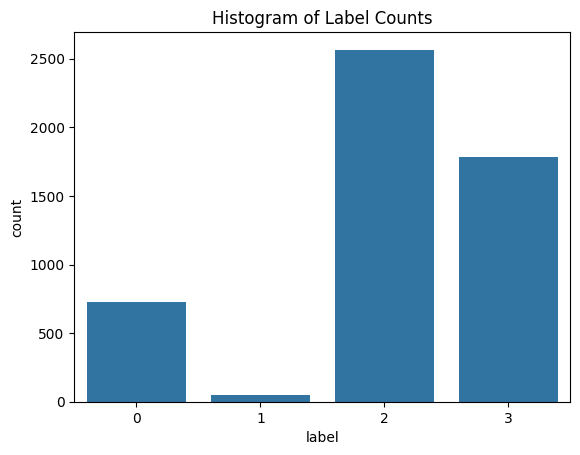

In [18]:
#try this in seaborn (supposedly prettier), also was simpler and automatically did it from 0-3, instead
#of highest to lowest


import seaborn as sns
#import matplotlib.pyplot as plt

sns.countplot(x='label', data=train_df)
plt.title('Histogram of Label Counts')
plt.show()


Summary:  There are 4 classes, listed 0-3.  There is some degree of class imbalance.  Each image has been pixelated and is  a numpy array object.  So my task is to classify these images.  There is already a test and train dataset, so I may not have to split, just test on the test_df dataframe.  Lets get machine learning!

#Try some machine learning on images

Trying an SVM

In [22]:
#import pandas as pd
#import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

#the below is from this link:  https://www.geeksforgeeks.org/machine-learning/image-classification-using-support-vector-machine-svm-in-python/
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [27]:
#separate input images and output labels
#input data
x=train_df.iloc[:,:-1]
#output data
y=train_df.iloc[:,-1]

In [28]:
#lets do the same for test
xtest=test_df.iloc[:,:-1]
#output data
ytest=test_df.iloc[:,-1]

In [29]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [30]:
# Training the model using the training data
model.fit(x,y)

ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
TypeError: only length-1 arrays can be converted to Python scalars

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py", line 197, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: setting an array element with a sequence.


In [ ]:
#some troubleshooting from copilot

In [35]:
#y = train_df.iloc[:, -1]  #already did this

In [31]:
print(y.shape)

(5120,)


In [32]:
print(y.head())

0    2
1    0
2    3
3    3
4    2
Name: label, dtype: int64


In [33]:
print(type(y.iloc[0]))

<class 'numpy.int64'>


In [37]:
#checking the size of the numpy arrays representing the images:

shapes = train_df['image'].apply(lambda a: a.shape)
print(shapes.value_counts())
#they are all 128x128


image
(128, 128)    5120
Name: count, dtype: int64


In [39]:
#try this - VERY IMPORTANT
X = np.stack(train_df['image'].apply(lambda a: a.reshape(-1)))

try this

In [40]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = SVC(kernel='linear')  # or 'rbf', but start simple
model.fit(X_train, y_train)


SVC(kernel='linear')

ok, that seemed to work, this is what the 'X = np.stack(train_df['image'].apply(lambda a: a.reshape(-1)))' code does (as per copilot):

Step by step


train_df['image']
Selects the image column from your DataFrame. Each entry is expected to be an image represented as a NumPy array (e.g., shapes like (H, W) for grayscale, (H, W, 3) for RGB).


.apply(lambda a: a.reshape(-1))
For each image array a, this flattens it into a 1D vector using reshape(-1).

Example:

(64, 64, 3) → 64*64*3 = 12,288-length vector
(32, 32) → 1,024-length vector


reshape(-1) is equivalent to a.ravel() or a.flatten() but preserves the view semantics depending on contiguity.



np.stack(...)
Takes all those 1D vectors (generated per row) and stacks them into a single 2D array by adding a new axis.

Result shape: (n_samples, n_features)
Where:

n_samples = len(train_df) (number of rows)
n_features = flattened length per image (e.g., H*W*C)



This is exactly the format most scikit‑learn models expect for X.


What it’s used for

Turning a column of images into a feature matrix suitable for machine learning models (e.g., SVM, logistic regression), where each row is one sample and each column is a pixel feature.

In [41]:

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))


Train accuracy: 1.0
Test accuracy: 0.962890625


In [ ]:
#ok that worked!
#now test it on the real test.parquet.  I think i have already structured everything correctly, but probably need to do so on the test_df dataset

In [43]:
#check somthing real quick
#shapes = X['image'].apply(lambda a: a.shape)
print(X.shape)
#im not sure what this means, but it is different than x.shape

(5120, 16384)


In [44]:
print(x.shape)

(5120, 1)


In [45]:
#X is the train_df image column that has been reshaped / flattened to 1D vetor
#y is the train_df label column
#so should just have to do model.fit this on (X,y), then test on test_df (but need to reshape/flatten test_df image column)
model.fit(X,y)


SVC(kernel='linear')

In [46]:
X_test_real = np.stack(xtest['image'].apply(lambda a: a.reshape(-1)))

In [47]:
#X:  LABEL THIS!
#x:  LABEL THIS!
#y:  LABEL THIS!
#X_test_real:  LABEL THIS!
#xtest is:  LABEL THIS!
#ytest is:  LABEL THIS!
#X_train, X_test, y_train, y_test:  LABEL THESE!

In [ ]:
#so now, the model has been fit on X and y (which is
#now test it model using X_test_real and ytest

In [48]:
print("Train accuracy:", model.score(X, y))
print("Test accuracy:", model.score(X_test_real, ytest))

Train accuracy: 1.0
Test accuracy: 0.98203125


In [ ]:
#this is pretty good though... 98% accuracy

#can also try different SVM parameters (such as rbf etc., look above, maybe even kernel trick!)
#can also look at different metrics, such as f1 score, confusion matrix, precision, recall, etc)
# 'tool_flacs_v7.ipynb' in ieeehealthhack for setup of confusion matric/etc.

In [51]:
#let me get the confusion matrix at least!

pred1 = model.predict(X_test_real)



In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest, pred1))

[[167   0   3   2]
 [  0  15   0   0]
 [  0   0 630   4]
 [  3   0  11 445]]


In [54]:
print(classification_report(ytest, pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       172
           1       1.00      1.00      1.00        15
           2       0.98      0.99      0.99       634
           3       0.99      0.97      0.98       459

    accuracy                           0.98      1280
   macro avg       0.99      0.98      0.99      1280
weighted avg       0.98      0.98      0.98      1280



In [ ]:
#fin